# **1.	Problem Statement**
A company wants to predict employee productivity scores to improve workforce planning and training programs.  
You are hired as a Data Scientist to build a multivariate linear regression model that predicts an employee’s Productivity Score based on multiple work-related factors.

| Experience (yrs) | Training Hours | Working Hours | Projects | Productivity Score |
|-----------------|---------------|---------------|----------|--------------------|
| 2               | 40            | 38            | 3        | 62                 |
| 5               | 60            | 42            | 6        | 78                 |
| 1               | 20            | 35            | 2        | 55                 |
| 8               | 80            | 45            | 8        | 88                 |
| 4               | 50            | 40            | 5        | 72                 |
| 10              | 90            | 48            | 9        | 92                 |
| 3               | 30            | 37            | 4        | 65                 |
| 6               | 70            | 44            | 7        | 82                 |


Interpretation
- Which factor most strongly impacts productivity?
- How does training affect productivity?
- Should the company increase training hours or working hours?
- What happens if Working Hours increase beyond optimal limits?
- Can productivity ever decrease with more experience?
- How would you detect overfitting in this model?
- Suggest one new feature to improve prediction accuracy.


In [2]:
# Data presentation
import pandas as pd

data = {
    'Experience (yrs)': [2, 5, 1, 8, 4, 10, 3, 6, 7, 2],
    'Training Hours': [40, 60, 20, 80, 50, 90, 30, 70, 75, 25],
    'Working Hours': [38, 42, 35, 45, 40, 48, 37, 44, 46, 36],
    'Projects': [3, 6, 2, 8, 5, 9, 4, 7, 7, 3],
    'Productivity Score': [62, 78, 55, 88, 72, 92, 65, 82, 85, 60]
}

df = pd.DataFrame(data)

# print(df.head())
df

,Experience (yrs),Training Hours,Working Hours,Projects,Productivity Score
0,2,40,38,3,62
1,5,60,42,6,78
2,1,20,35,2,55
3,8,80,45,8,88
4,4,50,40,5,72
5,10,90,48,9,92
6,3,30,37,4,65
7,6,70,44,7,82
8,7,75,46,7,85
9,2,25,36,3,60


A correlation matrix to identify features whose values correlate well with the label.  
Correlation values have the following meanings:
- 1.0: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
- -1.0: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
- 0.0: no correlation; the two columns are not linearly related.
In general, the higher the absolute value of a correlation value, the greater its predictive power.

In [3]:
df.corr(numeric_only=True)

,Experience (yrs),Training Hours,Working Hours,Projects,Productivity Score
Experience (yrs),1.000000,0.969810,0.973178,0.988194,0.981991
Training Hours,0.969810,1.000000,0.993132,0.977151,0.987045
Working Hours,0.973178,0.993132,1.000000,0.974701,0.985684
Projects,0.988194,0.977151,0.974701,1.000000,0.995696
Productivity Score,0.981991,0.987045,0.985684,0.995696,1.000000


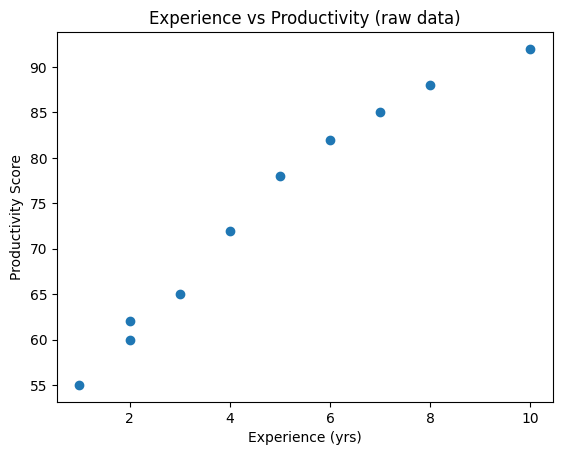

In [11]:
# Can productivity ever decrease with more experience?
# let's visualize it
import matplotlib.pyplot as plt

plt.scatter(df['Experience (yrs)'], df['Productivity Score'])# color='tab:blue', alpha=0.7)
plt.xlabel('Experience (yrs)')
plt.ylabel('Productivity Score')
plt.title('Experience vs Productivity (raw data)')
#plt.grid(alpha=0.2)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Define features (X) and target (y)
X = df[['Experience (yrs)', 'Training Hours', 'Working Hours', 'Projects']]
y = df['Productivity Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
# coefficient values of the regression object
print('model intercept', model.intercept_)
print('model coefficient', model.coef_)

model intercept 78.16864608076
model coefficient [-0.26365796  0.27268409 -1.08551069  4.88598575]


Model Coefficients: These values indicate the change in the Productivity Score for a one-unit increase in the corresponding feature, assuming all other features are held constant.

**Experience (yrs) Coefficient (-0.26)**: For every one-year increase in Experience, the Productivity Score is predicted to decrease by approximately 0.26 units, holding all other factors constant.

**Training Hours Coefficient (0.27)**: For every one-hour increase in Training Hours, the Productivity Score is predicted to increase by approximately 0.27 units, holding all other factors constant. This suggests that more training generally leads to higher productivity.

**Working Hours Coefficient (-1.09)**: For every one-hour increase in Working Hours, the Productivity Score is predicted to decrease by approximately 1.09 units, holding all other factors constant. This is a significant negative impact and implies that increasing working hours beyond the current range in the dataset or an optimal point could lead to reduced productivity, possibly due to burnout or decreased efficiency.

**Projects Coefficient (4.89)**: For every one-unit increase in Projects completed, the Productivity Score is predicted to increase by approximately 4.89 units, holding all other factors constant. This suggests that the number of projects an employee handles is a very strong positive indicator of their productivity, aligning with the correlation analysis that showed 'Projects' had the highest correlation with 'Productivity Score'

In [17]:
# Which factor most strongly impacts productivity?
# How does training affect productivity?
# Should the company increase training hours or working hours?
# What happens if Working Hours increase beyond optimal limits?
# Can productivity ever decrease with more experience?
answer = """
Which factor most strongly impacts productivity?
The most factor that strongly impacts productivity is Projects, because correlation matrix show it's the highest: 0.9959696

How does training affect productivity?
The high value is also there: 0.987045

Should the company increase training hours or working hours?
Comparing both score, increasing training hours will be better

What happens if Working Hours increase beyond optimal limits?
From coefficient of the mode, it's -1.09, so productivity will be decreased.

Can productivity ever decrease with more experience?
No, from the raw data plot it shown no decrease in productivity with more experience, but from the model cofficient it's shown it can decrease.

"""
print(answer)


Which factor most strongly impacts productivity?
The most factor that strongly impacts productivity is Projects, because correlation matrix show it's the highest: 0.9959696

How does training affect productivity?
The high value is also there: 0.987045

Should the company increase training hours or working hours?
Comparing both score, increasing training hours will be better

What happens if Working Hours increase beyond optimal limits?
From coefficient of the mode, it's -1.09, so productivity will be decreased.

Can productivity ever decrease with more experience?
No, from the raw data plot it shown no decrease in productivity with more experience, but from the model cofficient it's shown it can decrease.




Compare Training and Test Performance (R-squared and MSE):

To Calculate the R-squared (or MSE) on your X_train and y_train data.
Compare this to the R-squared (or MSE) you already calculated on X_test and y_test.
Indications of Overfitting: If the model performs significantly better (much higher R-squared or much lower MSE) on the training data than on the test data, it's a strong sign of overfitting.

In [16]:
# Make predictions on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set
print('--- Test Set Metrics ---')
print('MAE (Test):', mean_absolute_error(y_test, y_pred_test))
print('MSE (Test):', mean_squared_error(y_test, y_pred_test))
print('R2 Score (Test):', r2_score(y_test, y_pred_test))

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set
print('\n--- Training Set Metrics ---')
print('MAE (Train):', mean_absolute_error(y_train, y_pred_train))
print('MSE (Train):', mean_squared_error(y_train, y_pred_train))
print('R2 Score (Train):', r2_score(y_train, y_pred_train))

--- Test Set Metrics ---
MAE (Test): 2.5106888361045137
MSE (Test): 8.396082170603862
R2 Score (Test): 0.3146055370935623

--- Training Set Metrics ---
MAE (Train): 0.10095011876484339
MSE (Train): 0.01425178147268368
R2 Score (Train): 0.9999147875547224


Training Set Metrics:

MAE (Train): 0.10
MSE (Train): 0.01
R2 Score (Train): 0.9999 (almost perfect)
Test Set Metrics:

MAE (Test): 2.51
MSE (Test): 8.40
R2 Score (Test): 0.31
The model performs well on the training data , but not too much on unseen test data (R2 of 0.31). This huge discrepancy is sign of overfitting.

feature called 'Project Efficiency'.

Definition: 'Project Efficiency' can be calculated by dividing the number of 'Projects' an employee handles by their 'Working Hours'.

Why it might help:

Captures efficiency: This feature directly measures how many projects an employee completes per hour worked. A higher ratio would indicate greater efficiency.
Addresses negative coefficients: Given that 'Working Hours' had a negative coefficient in your model, this new feature could help contextualize why working more hours might decrease productivity (e.g., if project completion doesn't scale with increased hours).
Highlights high performers: Employees who complete many projects in fewer hours would score high on this metric, potentially revealing a stronger correlation with productivity than either 'Projects' or 'Working Hours' alone.

Suggest one new feature to improve prediction accuracy.


### 'Project Efficiency'

A new feature called **'Project Efficiency'** by dividing 'Projects' by 'Working Hours'. To give insights into how efficiently employees are completing projects given their working hours.

In [18]:
# Create the new 'Project Efficiency' feature
df['Project Efficiency'] = df['Projects'] / df['Working Hours']

# Display the DataFrame with the new feature
print("DataFrame with 'Project Efficiency' feature:")
print(df.head())

# You would then re-run your correlation analysis and model training/evaluation
# including this new feature to see its impact on prediction accuracy.

DataFrame with 'Project Efficiency' feature:
   Experience (yrs)  Training Hours  Working Hours  Projects  \
0                 2              40             38         3   
1                 5              60             42         6   
2                 1              20             35         2   
3                 8              80             45         8   
4                 4              50             40         5   

   Productivity Score  Project Efficiency  
0                  62            0.078947  
1                  78            0.142857  
2                  55            0.057143  
3                  88            0.177778  
4                  72            0.125000  
